In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from upcycle.plotting.credible_regions import get_gaussian_region, combine_trials

sns.set(font_scale=1.5, style='whitegrid')

In [2]:
def get_arm(exp_dir, arm_name, table_name, x_col, y_col, window=1):
    arm_path = Path(exp_dir) / arm_name
    arm_dfs = [pd.read_csv(f) for f in arm_path.rglob(f'*{table_name}*')]
    print(f"{len(arm_dfs)} tables found in {arm_path.as_posix()}")
    
    merged_df = combine_trials(arm_dfs, x_col)
    yval_df = merged_df.filter(regex=f'^{y_col}', axis=1)
    
    x_range = merged_df[x_col]
    arm_data = yval_df.rolling(window, min_periods=1).mean().values
    
    mean, lb, ub = get_gaussian_region(arm_data.mean(-1), arm_data.var(-1))
    return x_range, mean, lb, ub

In [3]:
palette = sns.color_palette('bright')

exp_dir = '../data/experiments/regression/svgp_num_update_steps_ablation'
dataset = 'elevators'
model_types = ['svgp_regression']
num_update_steps = [1, 2, 4]
model_labels = dict(exact_gp_regression='Exact', wiski_gp_regression='WISKI', svgp_regression='O-SVGP')
model_colors = dict(exact_gp_regression=palette[7], wiski_gp_regression=palette[4], svgp_regression=palette[0])
model_versions = dict(exact_gp_regression='v0.0.10', wiski_gp_regression='v0.0.11', svgp_regression='v0.0.11')
window = 4

10 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/1-elevators-v0.0.11
trials are not all the same length!
3 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/2-elevators-v0.0.11
trials are not all the same length!
5 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/4-elevators-v0.0.11
trials are not all the same length!


Text(0.5, 1.0, 'SVGP update step ablation - elevators')

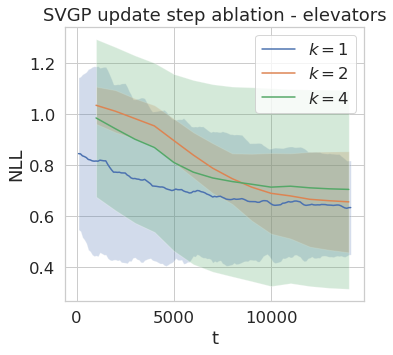

In [6]:
model_type = 'svgp_regression'
fig = plt.figure(figsize=(5.5, 5))
for num_steps in num_update_steps:
    arm_name = f"{num_steps}-{dataset}-v0.0.11"
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', 'test_nll', window)
    
    label = f"$k={num_steps}$"
    plt.plot(x_range, mean, label=label)
    plt.fill_between(x_range, lb, ub, alpha=0.25)

plt.xlabel('t')
plt.ylabel('NLL')
plt.legend()
# plt.ylim((1, 3))
plt.tight_layout()
plt.title(f'SVGP update step ablation - {dataset}')
# plt.savefig(f"figures/regression/num_inducing_ablation_{model_type}_{dataset}.pdf")

10 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/1-elevators-v0.0.11
trials are not all the same length!
3 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/2-elevators-v0.0.11
trials are not all the same length!
5 tables found in ../data/experiments/regression/svgp_num_update_steps_ablation/4-elevators-v0.0.11
trials are not all the same length!


Text(0.5, 1.0, 'SVGP update step ablation - elevators')

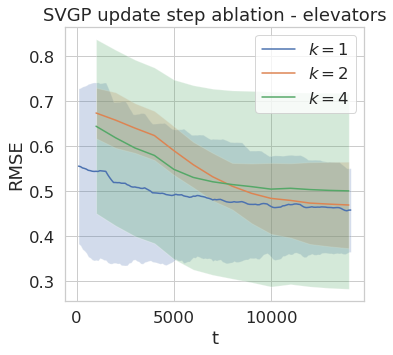

In [7]:
model_type = 'svgp_regression'
fig = plt.figure(figsize=(5.5, 5))
for num_steps in num_update_steps:
    arm_name = f"{num_steps}-{dataset}-v0.0.11"
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', 'test_rmse', window)
    
    label = f"$k={num_steps}$"
    plt.plot(x_range, mean, label=label)
    plt.fill_between(x_range, lb, ub, alpha=0.25)

plt.xlabel('t')
plt.ylabel('RMSE')
plt.legend()
# plt.ylim((1, 3))
plt.tight_layout()
plt.title(f'SVGP update step ablation - {dataset}')
# plt.savefig(f"figures/regression/num_inducing_ablation_{model_type}_{dataset}.pdf")